<a href="https://colab.research.google.com/github/MingxiaWu/jupyterlab/blob/main/housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston housing dataset
#boston = load_boston()
#X = boston.data
#y = boston.target

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


NameError: ignored

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000    

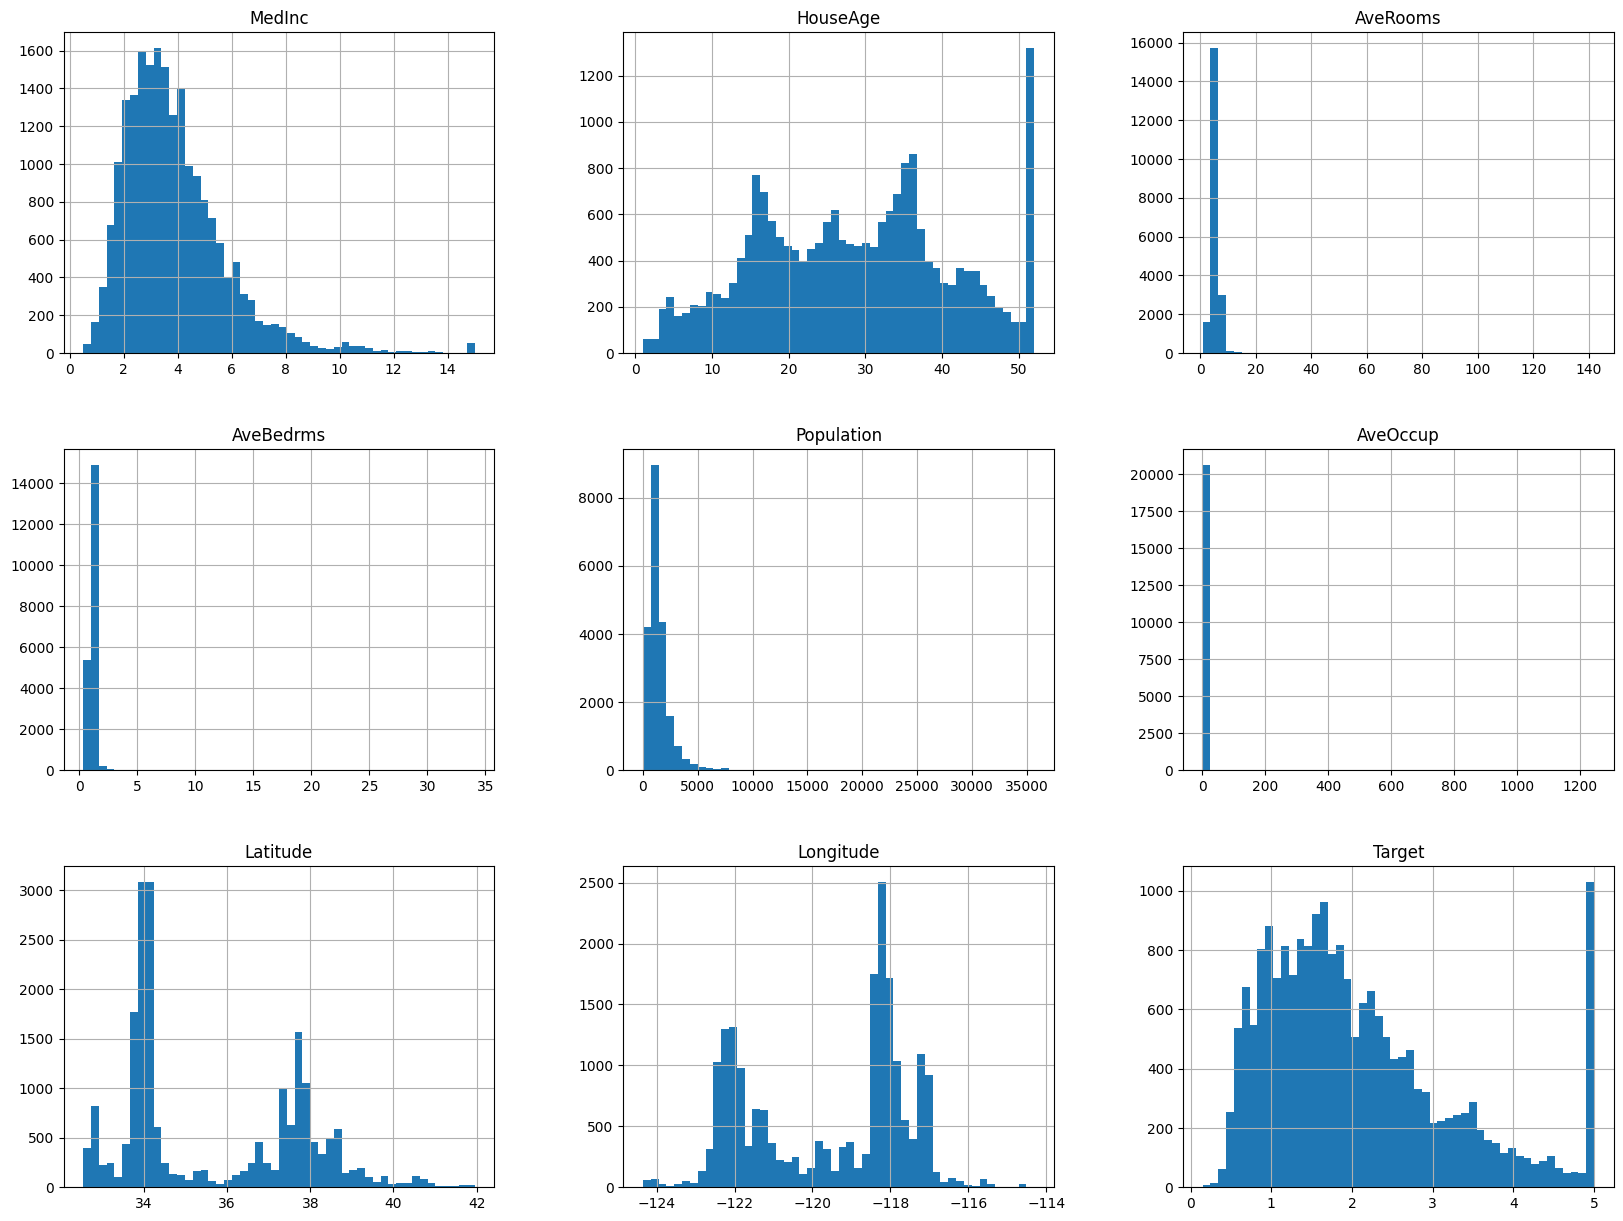

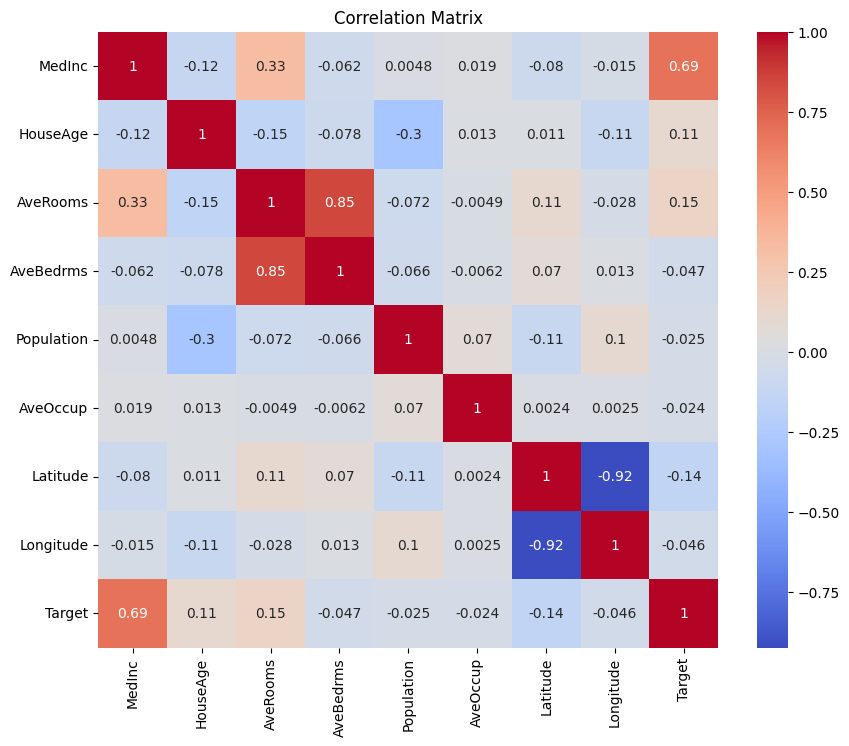

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=["Target"])

# Combine features and target for easy exploration
data = pd.concat([X, y], axis=1)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Show summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Plot distributions of features and target variable
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Proceed with the previous steps of data splitting, model training, and evaluation...


In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Setting a threshold for p-values
p_value_threshold = 0.05

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Iteratively remove features with the highest p-value
while True:
    model = sm.OLS(y, X_const).fit()
    max_p_value = model.pvalues.max()  # Get the max p-value
    feature_with_max_p_value = model.pvalues.idxmax()  # Get the feature with the max p-value

    if max_p_value > p_value_threshold:
        X_const = X_const.drop(columns=[feature_with_max_p_value])
    else:
        break

# Selected features
selected_features = X_const.columns
print("Selected features:", selected_features)

# Split the dataset into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_const[selected_features], y, test_size=0.2, random_state=42)

# Create a linear regression model using scikit-learn
model_sk = LinearRegression()

# Train the model
model_sk.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model_sk.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R^2 Score:", r2)


Selected features: Index(['const', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Mean Squared Error: 0.5559531347340669
R^2 Score: 0.5757407466176082


In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Setting a threshold for p-values
p_value_threshold = 0.05

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Iteratively remove features with the highest p-value
while True:
    model = sm.OLS(y, X_const).fit()
    max_p_value = model.pvalues.max()  # Get the max p-value
    feature_with_max_p_value = model.pvalues.idxmax()  # Get the feature with the max p-value

    # Display the feature and its p-value before dropping it
    print(f"Dropping feature: {feature_with_max_p_value}, P-Value: {max_p_value}")

    if max_p_value > p_value_threshold:
        X_const = X_const.drop(columns=[feature_with_max_p_value])
    else:
        break

# Selected features
selected_features = X_const.columns
print("Selected features:", selected_features)

# Split the dataset into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_const[selected_features], y, test_size=0.2, random_state=42)

# Create a linear regression model using scikit-learn
model_sk = LinearRegression()

# Train the model
model_sk.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model_sk.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R^2 Score:", r2)


Dropping feature: Population, P-Value: 0.4024471960877599
Dropping feature: AveOccup, P-Value: 3.985591608011258e-15
Selected features: Index(['const', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Mean Squared Error: 0.5559531347340669
R^2 Score: 0.5757407466176082


In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Setting a threshold for p-values
p_value_threshold = 0.05

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Iteratively remove features with the highest p-value
while True:
    model = sm.OLS(y, X_const).fit()
    max_p_value = model.pvalues.max()  # Get the max p-value
    feature_with_max_p_value = model.pvalues.idxmax()  # Get the feature with the max p-value

    if max_p_value > p_value_threshold:
        # Display the feature and its p-value before dropping it
        print(f"Dropping feature: {feature_with_max_p_value}, P-Value: {max_p_value}")
        X_const = X_const.drop(columns=[feature_with_max_p_value])
    else:
        break

# Selected features
selected_features = X_const.columns
print("Selected features:", selected_features)

# Split the dataset into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_const[selected_features], y, test_size=0.2, random_state=42)

# Create a linear regression model using scikit-learn
model_sk = LinearRegression()

# Train the model
model_sk.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model_sk.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R^2 Score:", r2)


Dropping feature: Population, P-Value: 0.4024471960877599
Selected features: Index(['const', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Mean Squared Error: 0.5559531347340669
R^2 Score: 0.5757407466176082


In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to train and evaluate the model
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Setting a threshold for p-values
p_value_threshold = 0.05

# Track performance
performance_tracker = []

# Iteratively remove features with the highest p-value
while True:
    model = sm.OLS(y, X_const).fit()
    max_p_value = model.pvalues.max()
    feature_with_max_p_value = model.pvalues.idxmax()

    # Evaluate and store performance before dropping the feature
    mse, r2 = evaluate_model(X_const, y)
    performance_tracker.append((len(X_const.columns) - 1, feature_with_max_p_value, max_p_value, mse, r2))

    if max_p_value > p_value_threshold:
        print(f"Dropping feature: {feature_with_max_p_value}, P-Value: {max_p_value}, MSE: {mse}, R²: {r2}")
        X_const = X_const.drop(columns=[feature_with_max_p_value])
    else:
        break

# Print performance comparison
print("\nPerformance Comparison:")
for step in performance_tracker:
    print(f"Features: {step[0]}, Dropped: {step[1]}, P-Value: {step[2]}, MSE: {step[3]}, R²: {step[4]}")

# Final model performance
final_mse, final_r2 = evaluate_model(X_const, y)
print("\nFinal Model - MSE:", final_mse, "R²:", final_r2)


Dropping feature: Population, P-Value: 0.4024471960877599, MSE: 0.5558915986952451, R²: 0.5757877060324502

Performance Comparison:
Features: 8, Dropped: Population, P-Value: 0.4024471960877599, MSE: 0.5558915986952451, R²: 0.5757877060324502
Features: 7, Dropped: AveOccup, P-Value: 3.985591608011258e-15, MSE: 0.5559531347340669, R²: 0.5757407466176082

Final Model - MSE: 0.5559531347340669 R²: 0.5757407466176082


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to train and evaluate the model
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Setting a threshold for p-values
p_value_threshold = 0.05

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Iteratively remove features with the highest p-value
while True:
    model = sm.OLS(y, X_const).fit()
    p_values = model.pvalues[1:]  # exclude the intercept
    max_p_value = p_values.max()  # Get the max p-value
    feature_with_max_p_value = p_values.idxmax()  # Get the feature with the max p-value

    # Break the loop if all p-values are below the threshold
    if max_p_value < p_value_threshold:
        break

    # Evaluate model before dropping the feature
    mse_before, r2_before = evaluate_model(X_const, y)

    # Drop the feature
    X_const = X_const.drop(columns=[feature_with_max_p_value])

    # Evaluate model after dropping the feature
    mse_after, r2_after = evaluate_model(X_const, y)

    # Display the information
    print(f"Dropped Feature: {feature_with_max_p_value}")
    print(f"Before Dropping - MSE: {mse_before}, R²: {r2_before}")
    print(f"After Dropping - MSE: {mse_after}, R²: {r2_after}\n")

# Final model performance
final_mse, final_r2 = evaluate_model(X_const, y)
print("\nFinal Model - MSE:", final_mse, "R²:", final_r2)


Dropped Feature: Population
Before Dropping - MSE: 0.5558915986952451, R²: 0.5757877060324502
After Dropping - MSE: 0.5559531347340669, R²: 0.5757407466176082


Final Model - MSE: 0.5559531347340669 R²: 0.5757407466176082


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=["Target"])

# Combine features and target for correlation analysis
data = pd.concat([X, y], axis=1)

# Calculate correlations
correlations = data.corr()['Target'].abs().sort_values(ascending=False)

# Set a threshold for selecting features
correlation_threshold = 0.1

# Select features above the correlation threshold
selected_features = correlations[correlations > correlation_threshold].index.drop('Target')
X_selected = X[selected_features]

# Split the dataset into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train.values.ravel())

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Selected features:", selected_features)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Selected features: Index(['MedInc', 'AveRooms', 'Latitude', 'HouseAge'], dtype='object')
Mean Squared Error: 0.6495475488975627
R^2 Score: 0.5043169272470043


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Apply a logarithmic transformation to numerical features
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[num_cols] = X[num_cols].apply(lambda x: np.log1p(x))

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Add a small constant to avoid log(0) and apply a logarithmic transformation
X += 1
X = np.log(X)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Check for any NaN values
if np.isnan(X_poly).any():
    X_poly = np.nan_to_num(X_poly)  # Replace NaNs with numerical values


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Ensure no zero or negative values
X = X.clip(lower=0.01)  # Replace negative and zero values with a small positive value

# Apply a logarithmic transformation to numerical features
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[num_cols] = X[num_cols].apply(np.log1p)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.46350284206541115
R^2 Score: 0.64629146338144
